In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df1 = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True)
#df1 = pd.concat([df,dummies],axis = 'columns')
#df1.drop(columns = ['Geography','Geography_France','Gender','Gender_Female'],inplace = True)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1.drop(columns = ['Exited']), df.Exited.values,test_size = 0.2,random_state=42)
y_train.shape

(8000,)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaler = scaler.fit_transform(X_test)
X_train_scaler = scaler.fit_transform(X_train)

X_train_scaler[4]


array([-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
       -1.54035103, -1.02583358, -1.05960019, -0.57946723, -0.57638802,
        0.91324755])

In [23]:
#Build ANN model

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer ='Adam', loss='binary_crossentropy',metrics = ['accuracy'] )

In [26]:
history = model.fit(X_train_scaler, y_train,epochs = 50, validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6383 - accuracy: 0.6172 - val_loss: 0.5083 - val_accuracy: 0.7944
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.7922 - val_loss: 0.4537 - val_accuracy: 0.8075
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8030 - val_loss: 0.4306 - val_accuracy: 0.8200
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8167 - val_loss: 0.4170 - val_accuracy: 0.8263
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8278 - val_loss: 0.4056 - val_accuracy: 0.8356
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8373 - val_loss: 0.3943 - val_accuracy: 0.8375
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8467 - val_loss: 0.3831 - val_accuracy: 0.8394
Epoch 

In [31]:
y_pred = model.predict(X_test_scaler)
y_pred = y_pred.argmax(axis=-1)

63/63 [==============================] - 0s 5ms/step


In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8035

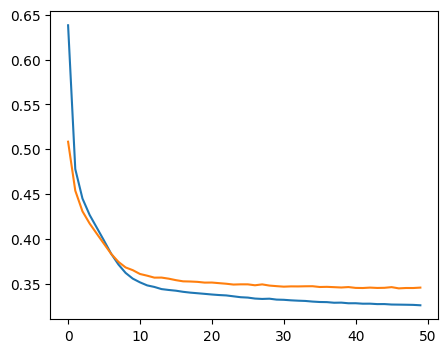

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

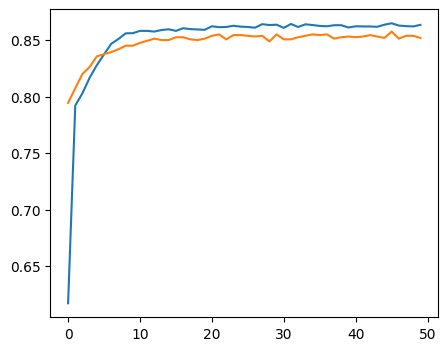

In [39]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()